# `Regression Metrices`

### MSC, MAE, RMSE, R2 Score, Adjusted R2 Score

`Mean Absolute Error (MAE)`

MAE measures the average absolute difference between the actual and predicted values.
It shows how far the predictions are from the true values on average, in the same unit as the target variable

`Mean Squared Error (MSE)`

MSE measures the average of the squared differences between the actual and predicted values.
It penalizes larger errors more because the errors are squared.

`Root Mean Squared Error (RMSE)`

RMSE is the square root of MSE, giving an error value in the same unit as the target.
It also penalizes large errors more strongly.

`R² Score (Coefficient of Determination)`

R² measures how well the model explains the variation in the target variable.
It tells how close the predictions are to the actual data points.
The value ranges from 0 to 1, where 1 = perfect prediction.

`Adjusted R² Score`

Adjusted R² modifies the R² score to account for the number of predictors (features) in the model.
It prevents R² from increasing unfairly when new features are added that don’t improve the model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('../Dataset/student_placement.csv')

In [3]:
# display first five rows
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

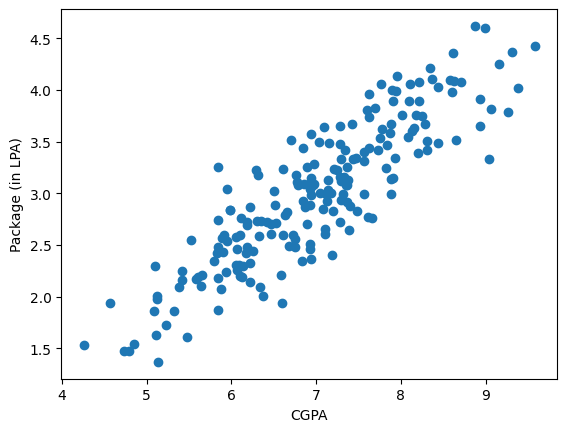

In [4]:
# plot scatter plot between 'cgpa' and 'package'
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [5]:
# split dataset into features and target variable
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# train the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

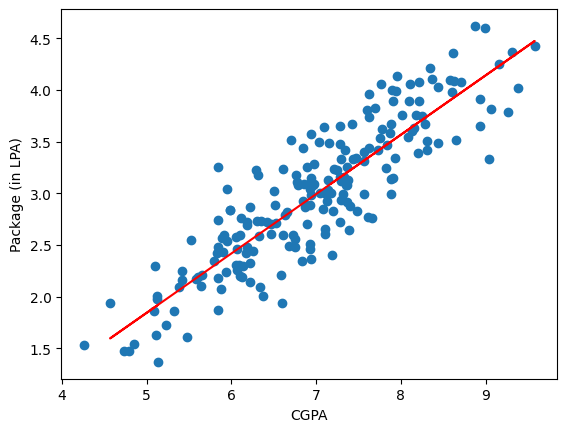

In [9]:
# plot regression line
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [10]:
# import regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# make predictions on test set
y_pred = lr.predict(X_test)

In [12]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [13]:
# calculate and print MAE
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.23150985393278373


In [14]:
# calculate and print MSE
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.08417638361329656


In [15]:
# calculate and print RMSE
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.2901316659954521


In [16]:
# calculate and print R2 Score
print("R2 Score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 Score 0.7730984312051673


In [17]:
# shape of test set
X_test.shape

(40, 1)

In [18]:
# Adjusted R2 Score
1- ((1- r2)*(40-1)/(40-1-1))

0.7671273372895138

### Adding new feature in df 

In [19]:
# addinf random feature to dataframe
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

# rearranging columns
new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.789653,3.26
1,5.12,0.145329,1.98
2,7.82,0.565552,3.25
3,7.42,0.672203,3.67
4,6.94,0.601457,3.57


Text(0, 0.5, 'Package(in lpa)')

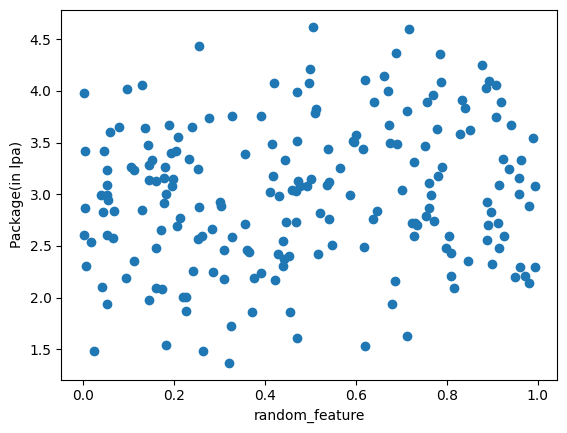

In [20]:
# plot scatter plot between 'random_feature' and 'package'
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [21]:
# split dataset into features and target variable
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [22]:
# split dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:

# train the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
# make predictions on test set
y_pred = lr.predict(X_test)

In [25]:
# calculate and print R2 Score
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7837625119147973


In [26]:
# Adjusted R2 Score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7720739990453269

In [27]:
# creating iq feature correlated with package
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

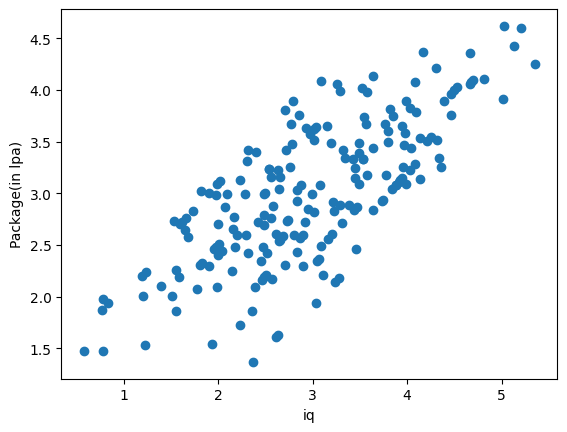

In [28]:
# plot scatter plot between 'iq' and 'package'
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [29]:
np.random.randint(-100,100)

57

In [30]:
# split dataset into features and target variable
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [31]:
# split dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [32]:
# train the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

# make predictions on test set
y_pred = lr.predict(X_test)

In [33]:
# calculate and print R2 Score
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7812154049942535


In [34]:
# Adjusted R2 Score
1 - ((1-r2)*(40-1)/(40-1-2))

0.7693892106696185